In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import dataset
review = pd.read_csv('/content/drive/MyDrive/Capstone/data/df_main.csv')
id = pd.read_csv('/content/drive/MyDrive/Capstone/data/entity_id.csv', index_col = [0])

review = review.drop_duplicates(subset = 'guid')
review = review.merge(id[['entity_id', 'name']], on='entity_id', how='left')

**Recoding**
- student life -> social life
- online learning -> drop
- housing -> campus facilities
- campus -> campus facilities
- value -> affordability, employability
- health & safety -> safety
- food -> campus facilities
- party scene -> social life
- academics -> academics

ratings:
- 1, 2 -> negative
- 3 -> neutural
- 4, 5 -> positive

In [5]:
df_review_category = review[~review['categories'].isin(['Overall Experience', 'Online Learning'])]
df_review_category['rating'] = df_review_category['rating'].map({1: 'negative', 2: 'negative', 3: 'neutural', 4: 'positive', 5:'negative'})
df_review_category['categories'] = df_review_category['categories'].map({'Student Life': 'social_life', 'Housing': 'campus_facilities', 'Campus': 'campus_facilities', 'Value': 'affordability', 'Health & Safety':'Safety', 'Food': 'campus_facilities', 'Party Scene': 'social_life', 'Academics': 'academics'})

df_review_category

<ipython-input-5-5e6ee704882f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_category['rating'] = df_review_category['rating'].map({1: 'negative', 2: 'negative', 3: 'neutural', 4: 'positive', 5:'negative'})
<ipython-input-5-5e6ee704882f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_category['categories'] = df_review_category['categories'].map({'Student Life': 'social_life', 'Housing': 'campus_facilities', 'Campus': 'campus_facilities', 'Value': 'affordability', 'Health & Safety':'

,guid,body,rating,author,created,categories,entity_id,date,name
11,4d669495-43d8-4928-81d8-287b4dccf2d5,Amherst College no longer has official/off-cam...,negative,Sophomore,2016-03-11 11:08:08,social_life,127ec524-4bac-4a5c-a7f5-1ead9c309f44,2016,Amherst College
12,0f2fefa4-d3e9-4770-a5e9-cd1df005315c,it is not available except in underground whic...,negative,Sophomore,2016-01-25 15:18:05,social_life,127ec524-4bac-4a5c-a7f5-1ead9c309f44,2016,Amherst College
13,ace8d33c-0ddc-48dc-b054-9af8402a8f47,"Compared to other colleges, the party scene at...",negative,Freshman,2015-04-26 02:25:30,social_life,127ec524-4bac-4a5c-a7f5-1ead9c309f44,2015,Amherst College
14,d58479fd-4fce-418e-8f25-da977c4397d6,"buildings aren't very well taken care of, ratt...",negative,Sophomore,2014-06-29 21:00:47,campus_facilities,127ec524-4bac-4a5c-a7f5-1ead9c309f44,2014,Amherst College
15,f3240e44-ddd6-4a64-8803-67d675d22f8a,The social life here is truly awful.,negative,Senior,2014-05-10 01:58:10,social_life,127ec524-4bac-4a5c-a7f5-1ead9c309f44,2014,Amherst College
...,...,...,...,...,...,...,...,...,...
9574,de233bc7-a4ee-4cb7-a206-1bcce596dc51,Bryan/College Station is a terrible place to h...,negative,Sophomore,2014-03-25 00:40:51,campus_facilities,ac9cfdaf-b7c0-44c8-931b-af5caa160f52,2014,Texas A&M University
9575,f658ac5a-162b-4b81-bef0-7b5b6079e7e8,I never received financial aid...so i'm bitter...,negative,Freshman,2014-01-13 18:11:40,affordability,ac9cfdaf-b7c0-44c8-931b-af5caa160f52,2014,Texas A&M University
9576,06b1c8cb-afc5-4f8f-8098-820b409c7997,nonexistent except for when they do something ...,negative,Junior,2013-12-20 15:45:56,social_life,ac9cfdaf-b7c0-44c8-931b-af5caa160f52,2013,Texas A&M University
9577,dd667030-7167-4f39-a0db-48170ec22773,It is very hard finding scholarships and grant...,negative,Sophomore,2013-12-13 01:31:29,affordability,ac9cfdaf-b7c0-44c8-931b-af5caa160f52,2013,Texas A&M University


In [12]:
df_review_category.to_csv('df_review_category.csv', index = False)

In [6]:
def plot_col_histogram(df, col_name, col_label, normalize = False):
  counts = df[col_name].value_counts(normalize= normalize)

  print(counts)

  plt.figure(figsize=(12, 6))
  bars = plt.bar(counts.index, counts.values)
  plt.title(f'Number of Reviews Count by {col_label}')
  plt.xlabel(f'{col_label}')
  plt.ylabel(f'Review Count')
  ax = plt.gca()  # Get current axis
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  for bar in bars:
          yval = bar.get_height()
          # Calculate percentage and format as a string
          percentage = f'{yval/len(df) * 100:.0f}%'
          plt.text(bar.get_x() + bar.get_width() / 2, yval, percentage,
                  ha='center', va='bottom', color='black')


  # for bar in bars:
  #   yval = bar.get_height()
  #   # plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

  #   plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}',
  #         ha='center', va='bottom')

  plt.tight_layout()
  # plt.show()

  return ax



rating
negative    2118
neutural     498
positive      68
Name: count, dtype: int64


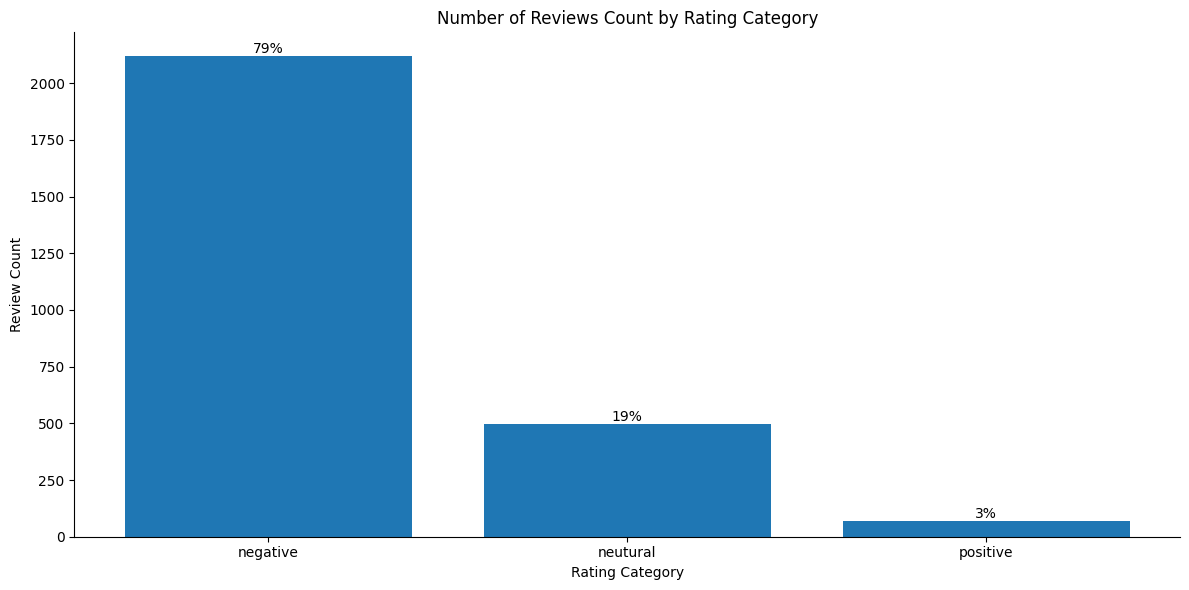

In [8]:
ax = plot_col_histogram(df_review_category, 'rating', 'Rating Category')

# Define the rating categories
rating_categories = {1: '1: Terrible', 2: '2: Poor', 3: '3: Average', 4: '4: Very Good', 5: '5: Excellent'}

# Set the descriptions as x-axis labels
ax.set_xticks(sorted(df_review_category['rating'].unique()))  # Set the x-ticks to correspond to the rating values
# ax.set_xticklabels([rating_categories[x] for x in sorted(df_review_category['rating'].unique())])

date
2016    905
2014    618
2015    600
2013    260
2012    129
2011    101
2010     65
2009      6
Name: count, dtype: int64


<Axes: title={'center': 'Number of Reviews Count by Review Age'}, xlabel='Review Age', ylabel='Review Count'>

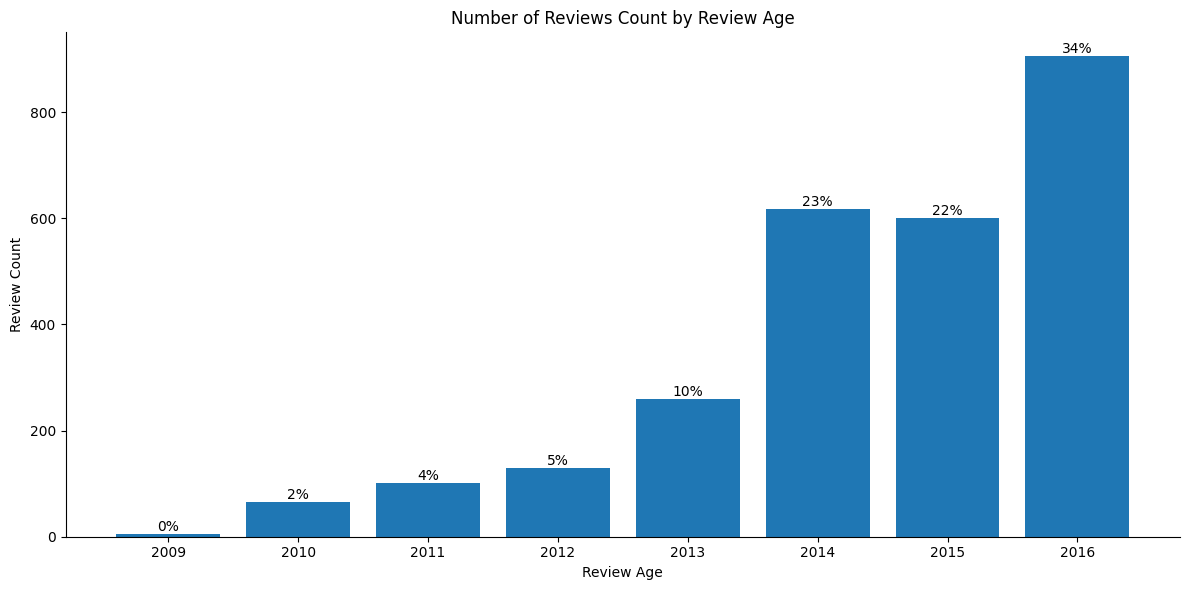

In [10]:
plot_col_histogram(df_review_category, 'date', 'Review Age')